ETAPA DE PRÉ-PROCESSAMENTO DOS DADOS

Os dados utilizados foram retirados da base de dados abertos da Polícia Federal.

Os dados podem ser obtidos através do link: https://servicos.dpf.gov.br/dadosabertos/SINARM_CSV/OCORRENCIAS/

Importação de bibliotecas

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Carregando os dados

In [6]:
#Encontrar o tipo de formatação dos dados

with open("OCORRENCIAS_2024.csv", "rb") as f:
    result = chardet.detect(f.read(100000))  # Lê os primeiros 100.000 bytes
    print(result["encoding"])

ISO-8859-1


In [15]:
#Transformar o padrão de codificação dos caracteres

with open("OCORRENCIAS_2024.csv", "r", encoding="ISO-8859-1") as f:
    conteudo = f.read()

with open("OCORRENCIAS_2024_utf8.csv", "w", encoding="utf-8") as f:
    f.write(conteudo)


In [26]:
#Carregamento dos dados
df = pd.read_csv("OCORRENCIAS_2024_utf8.csv", encoding="utf-8", sep=";") #Separador dos dados ";"

PRIMEIRAS INFORMAÇÕES SOBRE A BASE DE DADOS

In [27]:
display(df)

,ANO_OCORRENCIA,MES_OCORRENCIA,UF,MUNICIPIO,ESPECIE_ARMA,MARCA_ARMA,CALIBRE_ARMA,TIPO_OCORRENCIA,MAIS_1000_MIL_HAB,TOTAL
0,2024,1,AC,ACRELÂNDIA,Espingarda ...,ROSSI (AMADEO ROSSI S.A.) ...,28 ...,Furto de Arma de Fogo ...,N,1
1,2024,1,AC,ACRELÂNDIA,Pistola ...,TAURUS ARMAS S.A. ...,9x19mm ...,Furto de Arma de Fogo ...,N,1
2,2024,1,AC,RIO BRANCO,Pistola ...,TAURUS ARMAS S.A. ...,.380 ACP ...,Furto de Arma de Fogo ...,S,1
3,2024,1,AC,RIO BRANCO,Pistola ...,TAURUS ARMAS S.A. ...,.45 ACP ...,Apostilada no Exercito ...,S,1
4,2024,1,AC,RIO BRANCO,Pistola ...,TAURUS ARMAS S.A. ...,9 mm ...,Recuperação de Arma de Fogo ...,S,1
...,...,...,...,...,...,...,...,...,...,...
9194,2024,12,TO,ARAGUAÍNA,Pistola ...,TAURUS ARMAS S.A. ...,.40 S&W ...,Extravio/Perda de Arma de Fogo ...,S,1
9195,2024,12,TO,GURUPI,Rifle ...,CBC (COMPANHIA BRASILEIRA DE CARTUCHOS) ...,.22 LR ...,Extravio/Perda de Arma de Fogo ...,N,2
9196,2024,12,,,Carabina ...,ROSSI (AMADEO ROSSI S.A.) ...,.357 Mag ...,Campanha do Desarmamento ...,N,1
9197,2024,12,,,Espingarda ...,BOITO (E.R. AMANTINO & CIA) ...,12 ...,Furto de Arma de Fogo ...,N,1


In [28]:
#Explorar os dados

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9199 entries, 0 to 9198
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO_OCORRENCIA     9199 non-null   int64 
 1   MES_OCORRENCIA     9199 non-null   int64 
 2   UF                 9199 non-null   object
 3   MUNICIPIO          9199 non-null   object
 4   ESPECIE_ARMA       9199 non-null   object
 5   MARCA_ARMA         9199 non-null   object
 6   CALIBRE_ARMA       9199 non-null   object
 7   TIPO_OCORRENCIA    9199 non-null   object
 8   MAIS_1000_MIL_HAB  9199 non-null   object
 9   TOTAL              9199 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 718.8+ KB
None


Obs: Não existe dados nulos na base de dados

In [29]:
print(df.describe())

       ANO_OCORRENCIA  MES_OCORRENCIA        TOTAL
count          9199.0     9199.000000  9199.000000
mean           2024.0        6.324601     1.135667
std               0.0        3.191856     0.566389
min            2024.0        1.000000     1.000000
25%            2024.0        4.000000     1.000000
50%            2024.0        6.000000     1.000000
75%            2024.0        9.000000     1.000000
max            2024.0       12.000000    20.000000


Verificar se possuem outlier nos dados.

Pode ser que foi inserido algum dado errado na base

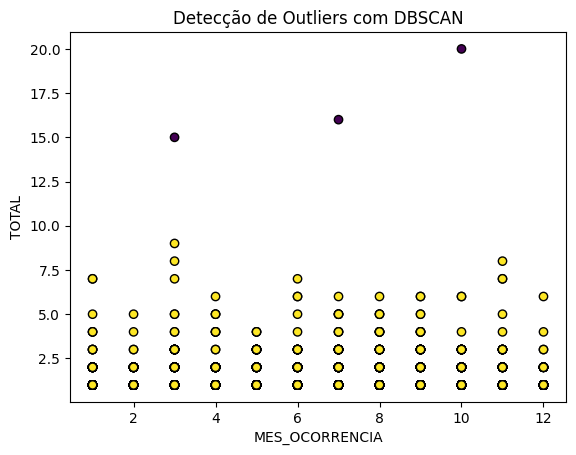

,ANO_OCORRENCIA,MES_OCORRENCIA,UF,MUNICIPIO,ESPECIE_ARMA,MARCA_ARMA,CALIBRE_ARMA,TIPO_OCORRENCIA,MAIS_1000_MIL_HAB,TOTAL,outlier
1436,2024,3,DF,BRASÍLIA,Revolver ...,TAURUS ARMAS S.A. ...,.38 ...,Remetida ao Exército para destruição ...,S,15,True
4787,2024,7,DF,BRASÍLIA,Pistola ...,TAURUS ARMAS S.A. ...,.380 ...,Extravio/Perda de Arma de Fogo ...,S,16,True
8099,2024,10,SP,RIBEIRÃO PRETO,Revolver ...,TAURUS ARMAS S.A. ...,.38 ...,Remetida ao Exército para destruição ...,S,20,True


In [38]:
#Cluster utilizando DBSCAN

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
data = df[numerical_cols].dropna()
scaled_data = StandardScaler().fit_transform(data)
# 3. Aplicar DBSCAN
dbscan = DBSCAN(eps=3.5, min_samples=5)  # Ajuste os parâmetros conforme necessário
labels = dbscan.fit_predict(scaled_data)

# 4. Identificar outliers (pontos com rótulo -1)
df["outlier"] = (labels == -1)

# 5. Visualizar os outliers
plt.scatter(data.iloc[:, 1], data.iloc[:, 2], c=labels, cmap="viridis", edgecolors='k')
plt.title("Detecção de Outliers com DBSCAN")
plt.xlabel(numerical_cols[1])
plt.ylabel(numerical_cols[2])
plt.show()

# 6. Exibir os outliers detectados
outliers = df[df["outlier"]]
display(outliers)

Pelo método DBSCAN encontrou-se 3 outlier.

In [76]:
#removendo os outliers encontrados
df_sem_outlier = df[df['TOTAL'] < 15]

Aplicando novamente o método DBSCAN

C:\Users\victo\AppData\Local\Temp\ipykernel_30148\2883176768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outlier["outlier"] = (labels == -1)


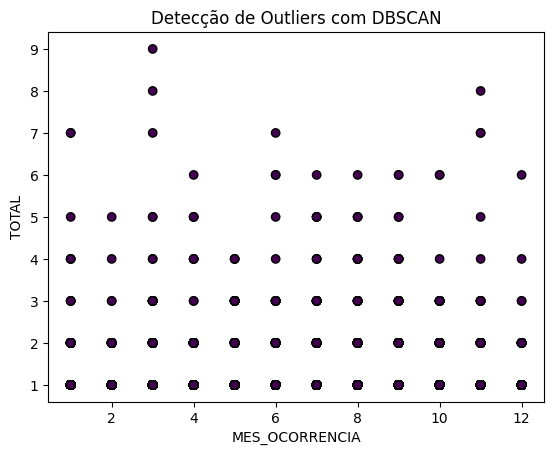

,ANO_OCORRENCIA,MES_OCORRENCIA,UF,MUNICIPIO,ESPECIE_ARMA,MARCA_ARMA,CALIBRE_ARMA,TIPO_OCORRENCIA,MAIS_1000_MIL_HAB,TOTAL,outlier


In [77]:
numerical_cols = df_sem_outlier.select_dtypes(include=['float64', 'int64']).columns
data = df_sem_outlier[numerical_cols].dropna()
scaled_data = StandardScaler().fit_transform(data)
# 3. Aplicar DBSCAN
dbscan = DBSCAN(eps=3.5, min_samples=5)  # Ajuste os parâmetros conforme necessário
labels = dbscan.fit_predict(scaled_data)

# 4. Identificar outliers (pontos com rótulo -1)
df_sem_outlier["outlier"] = (labels == -1)

# 5. Visualizar os outliers
plt.scatter(data.iloc[:, 1], data.iloc[:, 2], c=labels, cmap="viridis", edgecolors='k')
plt.title("Detecção de Outliers com DBSCAN")
plt.xlabel(numerical_cols[1])
plt.ylabel(numerical_cols[2])
plt.show()

# 6. Exibir os outliers detectados
outliers = df_sem_outlier[df_sem_outlier["outlier"]]
display(outliers)

Os outliers foram removidos.

In [78]:
#Salvar os dados sem outliers
df_sem_outlier.to_csv("OCORRENCIAS_2024_utf8_SEM_OUTLIERS.csv")

Gerando visualizações para verificação de novos tratamento para os dados.

C:\Users\victo\AppData\Local\Temp\ipykernel_30148\4119227621.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=uf_counts.index, y=uf_counts.values, palette="viridis")


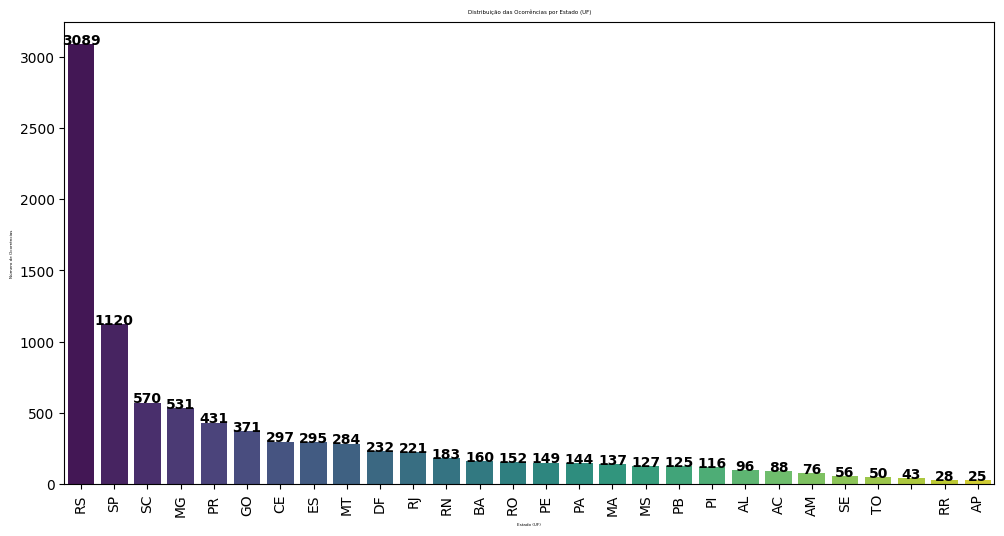

In [112]:
# Contar ocorrências por estado
uf_counts = df_sem_outlier["UF"].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=uf_counts.index, y=uf_counts.values, palette="viridis")

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posição X centralizada na barra
        bar.get_height() + 1,  # Posição Y um pouco acima da barra
        str(int(bar.get_height())),  # Convertendo o valor para string
        ha='center',  # Centralizando horizontalmente
        fontsize=10, 
        color='black',
        fontweight='bold'
    )

# Adicionar títulos e rótulos
plt.title("Distribuição das Ocorrências por Estado (UF)", fontsize=4)
plt.xlabel("Estado (UF)", fontsize=3)
plt.ylabel("Número de Ocorrências", fontsize=3)
plt.xticks(rotation=90)  # Rotacionar rótulos do eixo X se necessário

# Exibir o gráfico
plt.show()

C:\Users\victo\AppData\Local\Temp\ipykernel_30148\3822948962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=arma_counts.index, x=arma_counts.values, palette="magma")


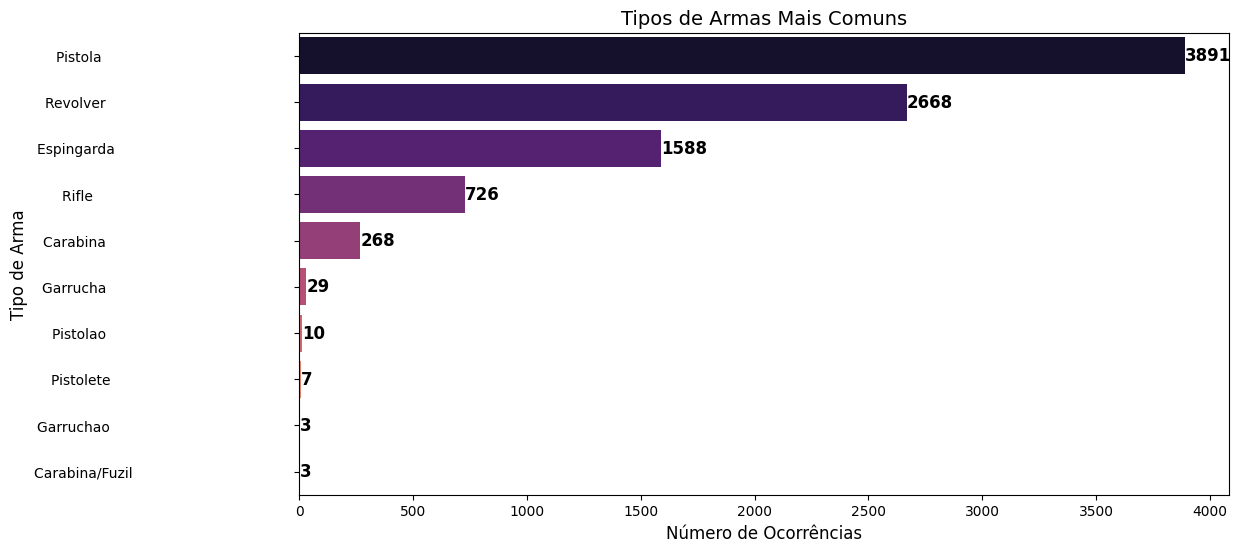

In [101]:
# Contar os tipos de armas mais comuns
arma_counts = df_sem_outlier["ESPECIE_ARMA"].value_counts().head(10)  # Seleciona os 10 mais comuns

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(y=arma_counts.index, x=arma_counts.values, palette="magma")

for index, value in enumerate(arma_counts.values):
    ax.text(value + 1, index, str(value), va='center', fontsize=12, color='black', fontweight='bold')

# Adicionar títulos e rótulos
plt.title("Tipos de Armas Mais Comuns", fontsize=14)
plt.xlabel("Número de Ocorrências", fontsize=12)
plt.ylabel("Tipo de Arma", fontsize=12)

# Exibir o gráfico
plt.show()

C:\Users\victo\AppData\Local\Temp\ipykernel_30148\2811449472.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tipo_ocorrencia_counts.values, y=tipo_ocorrencia_counts.index, palette="magma")


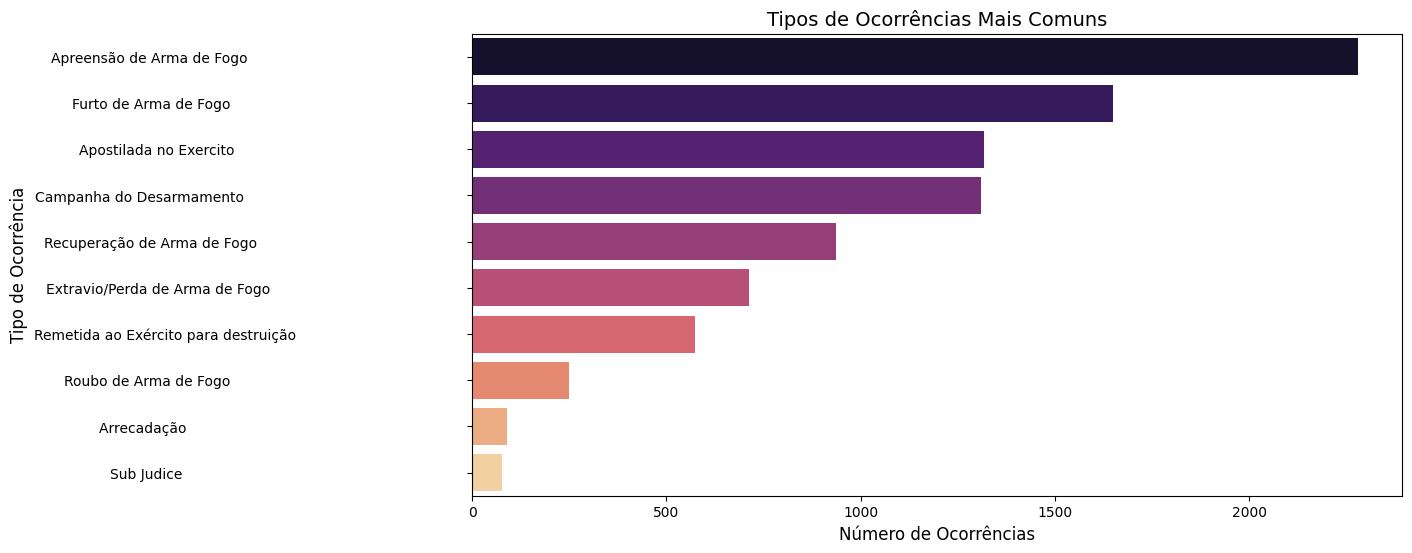

In [122]:
# Contar os tipos de armas mais comuns
tipo_ocorrencia_counts = df_sem_outlier["TIPO_OCORRENCIA"].value_counts().head(10)  # Seleciona os 10 mais comuns

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=tipo_ocorrencia_counts.values, y=tipo_ocorrencia_counts.index, palette="magma")


# Adicionar títulos e rótulos
plt.title("Tipos de Ocorrências Mais Comuns", fontsize=14)
plt.xlabel("Número de Ocorrências", fontsize=12)
plt.ylabel("Tipo de Ocorrência", fontsize=12)


# Exibir o gráfico
plt.show()